## Modelo com apenas um diretorio para train e validation split


In [54]:
# libs necessarias
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [55]:
# carregando as imagens
data_base_path = r'C:\Users\User\Downloads\Imagens'  

In [56]:
batch_size = 32 # tamanho do lote
img_width,img_height = 180,180 
img_size = (img_width,img_height)

epochs = 30 # epocas de rotacionamento 
learning_rate = 0.0001  # Taxa de aprendizagem para o otimizador
img_size

(180, 180)

In [57]:
# separando o conjunto de dados em treinamento e validação
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_base_path,
    shuffle = True,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_base_path,
    shuffle = True,
    seed=123,
    image_size=(img_height, img_width),
    subset="validation",
    batch_size=batch_size,
    validation_split=0.20,
)



Found 50 files belonging to 2 classes.
Found 50 files belonging to 2 classes.
Using 10 files for validation.


In [58]:
nomes_classes=train_ds.class_names
nomes_classes

['train', 'validation']

In [59]:
import matplotlib.pyplot as plt

# Exibindo algumas imagens de treinamento
def plot_imagens(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(nomes_classes[labels[i]])
            plt.axis("off")
    plt.show()
# plot_imagens(train_ds)

In [60]:
import matplotlib.pyplot as plt

# plot_imagens(val_ds)


In [61]:
num_classe=len(nomes_classes)
num_classe


2

In [62]:
# Configurações automáticas de desempenho
AUTOTUNE = tf.data.AUTOTUNE

# Preparação dos dados de treinamento
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Preparação dos dados de validação
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



In [63]:
# Normalização das imagens
shape=(img_width,img_height,3)
shape

(180, 180, 3)

In [64]:
from keras.layers import Rescaling
import numpy as np

normalizador = Rescaling(1./255)  # Normaliza os valores dos pixels das imagens para o intervalo [0,1]

normalized_ds = train_ds.map(lambda x, y: (normalizador(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0019610238 1.0


In [65]:
# Criando o modelo de rede neural
model = Sequential([
    layers.Rescaling(scale=1./255),# Camada de normalização
    layers.Conv2D(8, 3, padding='same', activation='relu'),  # Camada convolucional
    layers.MaxPooling2D(2,2),  # Camada de max pooling
    layers.Conv2D(16, 3, padding='same', activation='relu'),  # Camada convolucional
    layers.MaxPooling2D(2,2),  # Camada de max pooling
    layers.Conv2D(32, 3, padding='same', activation='relu'),  # Camada convolucional
    layers.MaxPooling2D(2,2),  # Camada de max pooling
    layers.Flatten(),  # Camada de flatten para transformar a saída em um vetor unidimensional
    layers.Dense(64, activation='relu'),  # Camada densa (totalmente conectada)
    layers.Dense(num_classe,activation='sigmoid')  # Camada de saída com ativação sigmoid para classificação
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=learning_rate)
# train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[reduce_lr]
    
)

Epoch 1/30


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.3604 - loss: 0.6956 - val_accuracy: 0.6000 - val_loss: 0.6610 - learning_rate: 1.0000e-04
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6929 - loss: 0.6261 - val_accuracy: 0.6000 - val_loss: 0.6525 - learning_rate: 1.0000e-04
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6929 - loss: 0.5991 - val_accuracy: 0.6000 - val_loss: 0.6496 - learning_rate: 1.0000e-04
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6929 - loss: 0.5859 - val_accuracy: 0.6000 - val_loss: 0.6384 - learning_rate: 1.0000e-04
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6570 - loss: 0.6000 - val_accuracy: 0.6000 - val_loss: 0.6143 - learning_rate: 1.0000e-04
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6570 - loss: 0.5841 - val_accuracy: 0.6000 - val_loss: 0.5876 - learning_rate: 1.0000e-04
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6570 - loss: 0.5685 - val_

In [67]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_16 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 180, 180, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 90, 90, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 90, 90, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 45, 45, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 45, 45, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       991,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,992,376 (11.42 MB)

 Trainable params: 997,458 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,994,918 (7.61 MB)

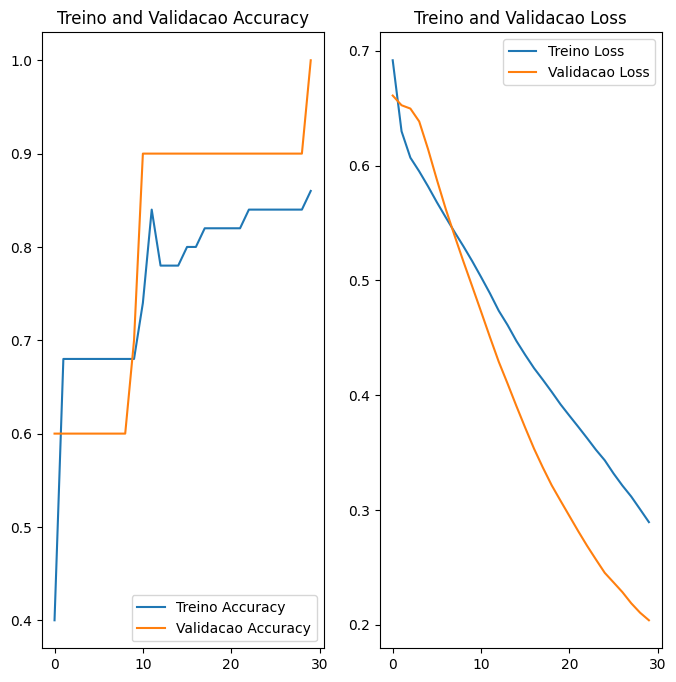

In [68]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

faixa_epochs = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(faixa_epochs, acc, label='Treino Accuracy')
plt.plot(faixa_epochs, val_acc, label='Validacao Accuracy')

plt.legend(loc='lower right')
plt.title('Treino and Validacao Accuracy')

plt.subplot(1, 2, 2)
plt.plot(faixa_epochs, loss, label='Treino Loss')
plt.plot(faixa_epochs, val_loss, label='Validacao Loss')
plt.legend(loc='upper right')
plt.title('Treino and Validacao Loss')
plt.show()

In [69]:
import numpy as np
def plot_one_img(img,score):
    # Plotar a imagem
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(f'Classificada como {nomes_classes[np.argmax(score)]}\ncom uma precisão de {100 * np.max(score):.2f}%')
    plt.axis('off')
    plt.show()
    
def classificar_for_wpp(path_img):
    img = tf.keras.utils.load_img(
        path_img, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    # plot_one_img(img,score)
    print(
        f"classificada como {nomes_classes[np.argmax(score)]} \ncom uma accuracy de {100 * np.max(score):.2f} %."
    )



classificar_for_wpp(r'C:\Users\User\Desktop\modelo_classifier\imagens_para_teste\escassa (31).jpg')
classificar_for_wpp(r'C:\Users\User\Desktop\modelo_classifier\imagens_para_teste\uniforme (13).jpg')
classificar_for_wpp(r'C:\Users\User\Desktop\modelo_classifier\imagens_para_teste\mediana (16).jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
classificada como validation 
com uma accuracy de 59.28 %.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
classificada como validation 
com uma accuracy de 53.13 %.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
classificada como train 
com uma accuracy de 59.14 %.


In [70]:
model.evaluate(val_ds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.2040


[0.20400981605052948, 1.0]